### 1. Imports

In [1]:
# these are some Jupyter-specific settings. Only really relevant when drawing charts on high-res screens.
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# imports...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Plot styling
plt.style.use('ggplot')

### 2. Load Data

We use the same data-set and method as in Excercise 1 _(Load CSV Data)_

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3. Examine the Data (correlations)

Python has some amazing plotting libraries available free of use. One of these is Seaborn _(built untop of Matplotlib)_, which is a statistical plotting tool.

Since we're doing simple regression, I'd say we'd be smart to see if we can model the quality of a given wine. 

The results below clearly states that the highest levels of correlation is between `alcohol` our dependent variable `quality`.

Thus we're interested in the following relationship:

$$\text{quality}=\beta_0+\beta_1\cdot\text{alcohol}+u$$

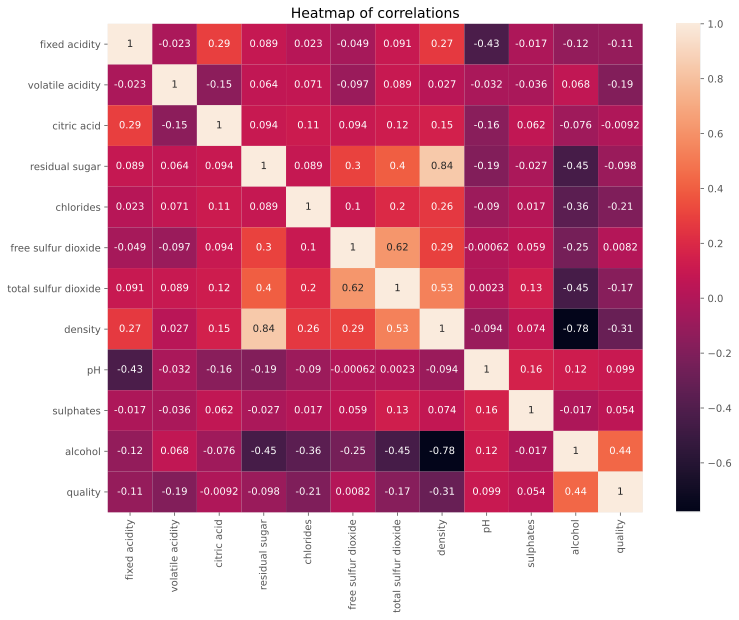

In [3]:
# Creates an empty figure to place the plot in. Only needed to have adjudsted size
plt.figure(figsize=(12,9))

# Set title of plot
plt.title('Heatmap of correlations', fontsize=14)

# Use the seaborn library to create the heatmap - passing the correlation between all variables as argument
sns.heatmap(df.corr(), annot=True, vmax=1)

# Explicitly show plot in-line (not required)
plt.show()

### 4. Fitting the model

Let's fit the model and see, which dependancy or significance we find.

Using the statsmodels package and it's OLS class, we can get a standard Stata-like output right in the Jupyter notebook.

In [4]:
reg = smf.ols('quality ~ alcohol', data=df).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Wed, 02 Sep 2020   Prob (F-statistic):          5.61e-226
Time:                        17:38:43   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5820      0.098     26.345      0.000       2.390       2.774
alcohol        0.3135      0.009     33.858      0.000       0.295       0.332
==============================================================================
Omnibus:                       88.780   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.233
Skew:                           0.031   Prob(JB):                     7.29e-40
Kurtosis:                       3.938   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

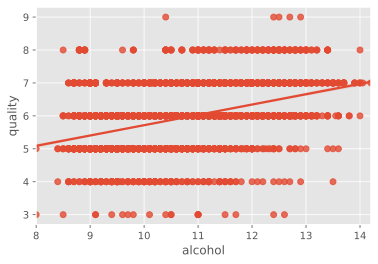

In [7]:
sns.regplot(x='alcohol', y='quality', data=df)
plt.show()